## About Google Play Store Apps dataset

Google Play Store is an online store where people go to find and install their required apps of different categories like business,games,social media apps etc.,. Here in this dataset it consists of 10841 apps and each app having 13 features.

### Objective : 
1. To perform data cleaning,structuring to make more appropriate usable format for better decision making
2. Analyzing the dataset for interpreting results and to find out insights,hidden patterns,future trends of dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Loading dataset

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.shape

(10841, 13)

## 1. Data Exploration

In [3]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
data.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 2. Data cleaning

#### 1.Checking for null values

In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

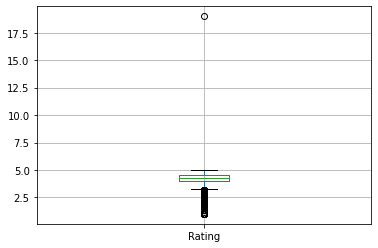

In [8]:
data.boxplot()

From the Box plot,observed that there are some outliers
#### 2.Removing outliers

In [9]:
# Here I am considering ratings whichever greater than 5 are outliers
data[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
# Removing the 10472 row from the dataset
data.drop([10472],inplace=True)

In [11]:
data[10469:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


<AxesSubplot:>

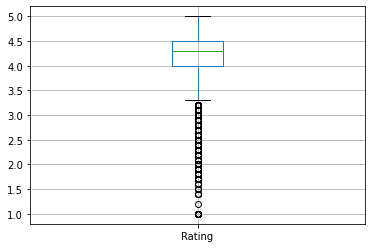

In [12]:
data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

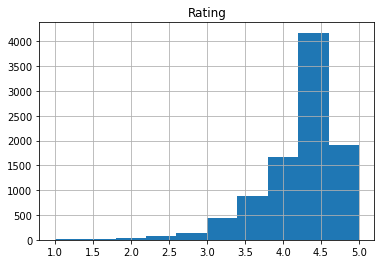

In [13]:
data.hist()

Here I am removing the columns which are 90 % empty

In [14]:
threshold = len(data)* 0.1
threshold

1084.0

In [15]:
data.dropna(thresh=threshold, axis=1, inplace=True)

In [16]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#### 3.Filling the missing values 

In [17]:
def impute_median(series):
    return series.fillna(series.median())

In [18]:
data.Rating=data['Rating'].transform(impute_median)

In [19]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
# Fill the missing categorical values with mode 
data['Type'].fillna(str(data['Type'].mode().values[0]), inplace=True)
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace=True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace=True)

In [21]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now all the null values were replaced

#### 4.Converting Price,Reviews and Ratings into Numerical values

In [22]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [23]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [24]:
data.head(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [25]:
data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## 3. Data Visualization

In [26]:
grp = data.groupby('Category')
print(grp['Rating'].agg(np.mean))
print(grp['Price'].agg(np.sum))
print(grp['Reviews'].agg(np.mean))

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

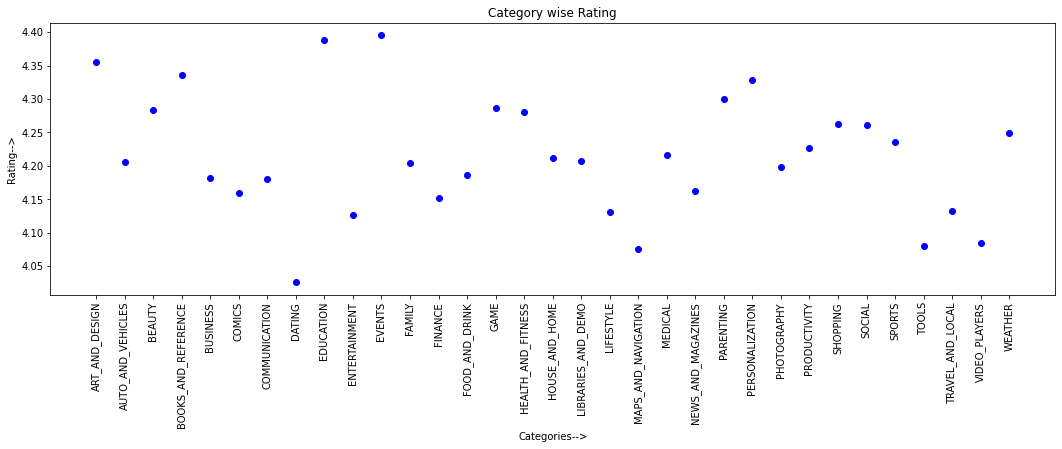

In [27]:
plt.figure(figsize=(18,5))
plt.plot(grp['Rating'].agg(np.mean), "bo")
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

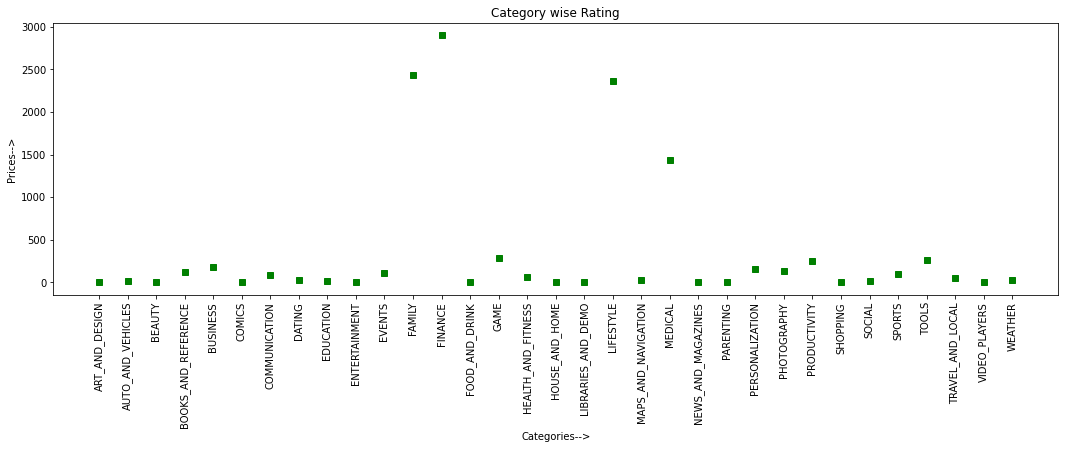

In [28]:
plt.figure(figsize=(18,5))
plt.plot(grp['Price'].agg(np.sum), "gs")
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

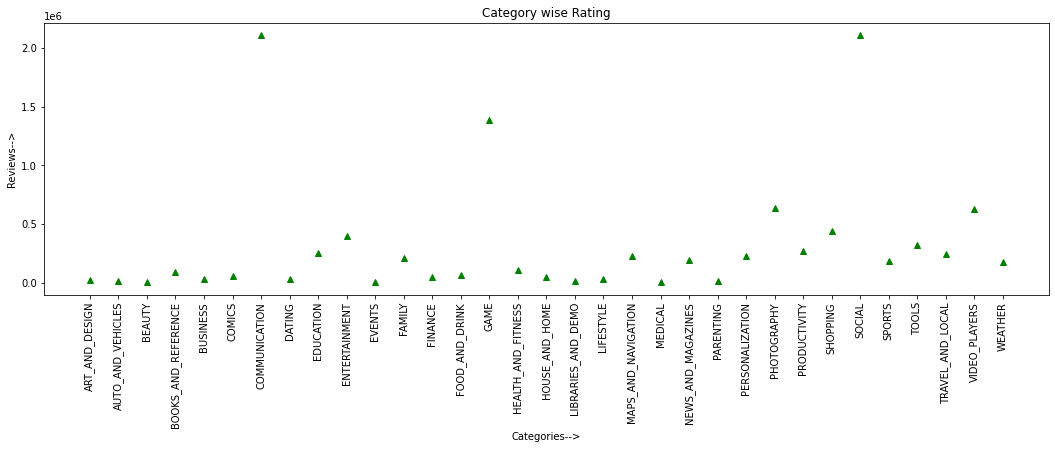

In [29]:
plt.figure(figsize=(18,5))
plt.plot(grp['Reviews'].agg(np.mean), "g^")
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

#### Distribution based on ratings of app

<AxesSubplot:xlabel='Rating', ylabel='Count'>

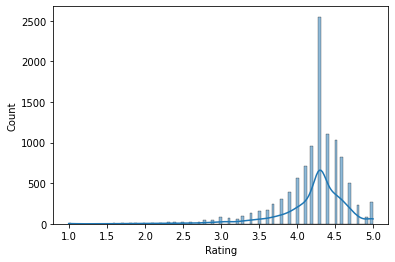

In [30]:
data["Rating"]= pd.to_numeric(data["Rating"],errors="coerce")
sns.histplot(data["Rating"],kde=True)

#### Paid apps vs Free apps

In [31]:
print("Free Apps",len(data[data['Type'] == "Free"]))
print("Paid Apps",len(data[data['Type'] == "Paid"]))

Free Apps 10040
Paid Apps 800


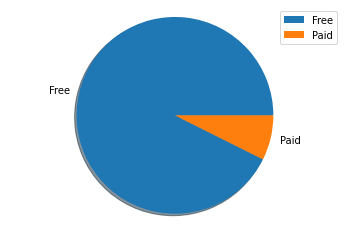

In [32]:
labels=["Free","Paid"]
d=[data["Type"].value_counts()[0],data["Type"].value_counts()[1]]
fig1,pt=plt.subplots()
pt.pie(d,labels=labels,shadow=True)
pt.axis("equal")
pt.legend()
plt.show()

#### Content Ratings distribution

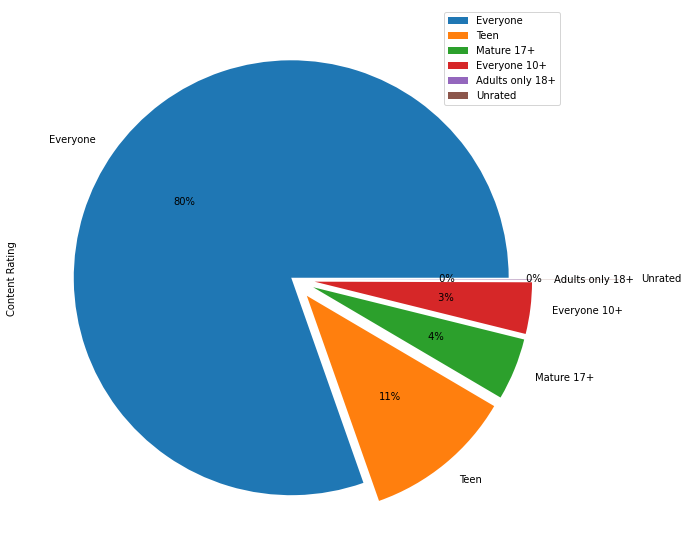

In [33]:
plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
data['Content Rating'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()


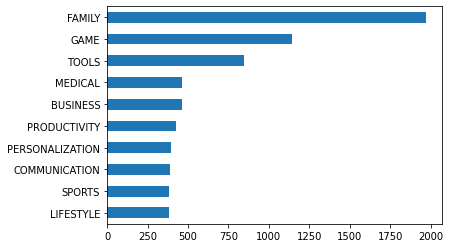

In [34]:
data["Category"].value_counts()[:10].sort_values(ascending=True).plot(kind="barh")
plt.show()

#### To know App with maximum number of reviews

In [35]:
data.loc[data["Reviews"].idxmax()]

App                         Facebook
Category                      SOCIAL
Rating                           4.1
Reviews                     78158306
Size              Varies with device
Installs                1000000000.0
Type                            Free
Price                            0.0
Content Rating                  Teen
Genres                        Social
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2544, dtype: object

#### To know App with highest rating

In [36]:
data.loc[data["Rating"].idxmax()]

App               Hojiboy Tojiboyev Life Hacks
Category                                COMICS
Rating                                     5.0
Reviews                                     15
Size                                       37M
Installs                                1000.0
Type                                      Free
Price                                      0.0
Content Rating                        Everyone
Genres                                  Comics
Last Updated                     June 26, 2018
Current Ver                                2.0
Android Ver                       4.0.3 and up
Name: 329, dtype: object

## Summary :
1. Performed Data cleaning like removing outliers and filled the null values with imputation method
2. Most of the apps were free 10040 and 800 apps were paid out of 10840.
3. Variation of prices,ratings,reviews with respect to categorywise apps were shown in graphs
4. Out of all apps,count of Family and Games categories apps were top 2 categories
5. Facebook is the app with highest number of reviews,it comes under Social category
6. Hojiboy Tojiboyev Life Hacks is the highest rated app,it comes under Comics category